<a href="https://colab.research.google.com/github/MuktoFlame/ML-Journey/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Theory

### About KNN

1. Supervised Learning Model
2. Used for Classification and Regression
3. Can be used for non-linear data
4. K - Neighbors

![Siddhardhan - 7.5.1. K-Nearest Neighbors (KNN) - intuition [PAwSpQAJLEs - 798x449 - 8m28s].png](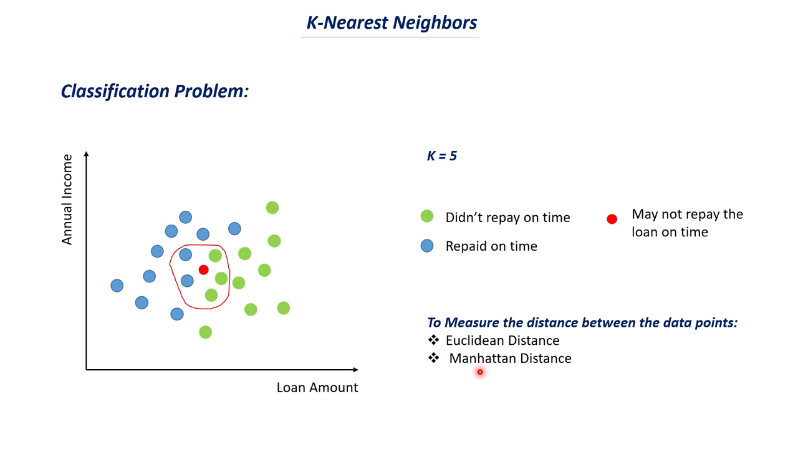)

![Siddhardhan - 7.5.1. K-Nearest Neighbors (KNN) - intuition [PAwSpQAJLEs - 798x449 - 12m21s].png](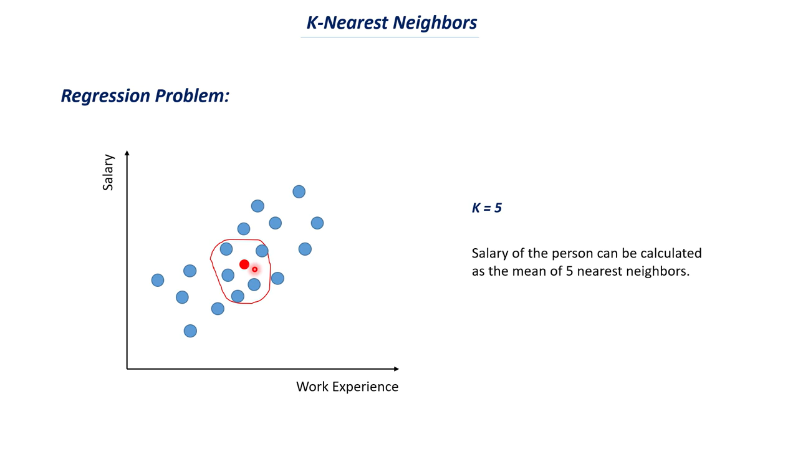)

![Siddhardhan - 7.5.1. K-Nearest Neighbors (KNN) - intuition [PAwSpQAJLEs - 798x449 - 17m20s].png](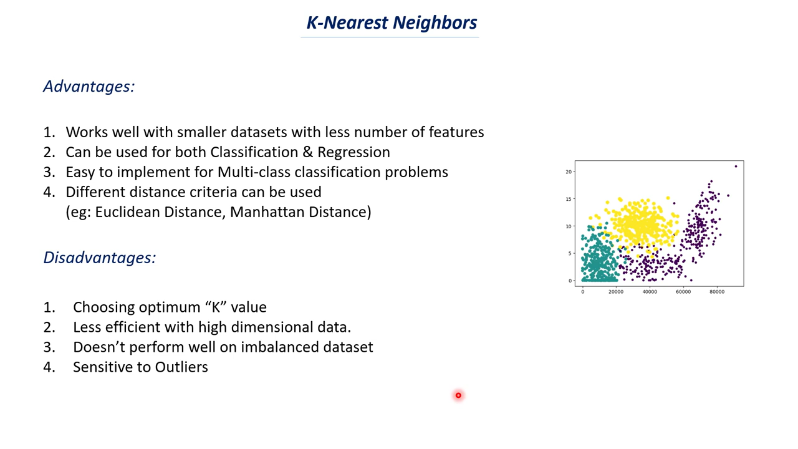)

![Siddhardhan - 7.5.2. Math behind K-Nearest Neighbors (KNN) [bN7Ibb6Mipk - 798x449 - 9m19s].png](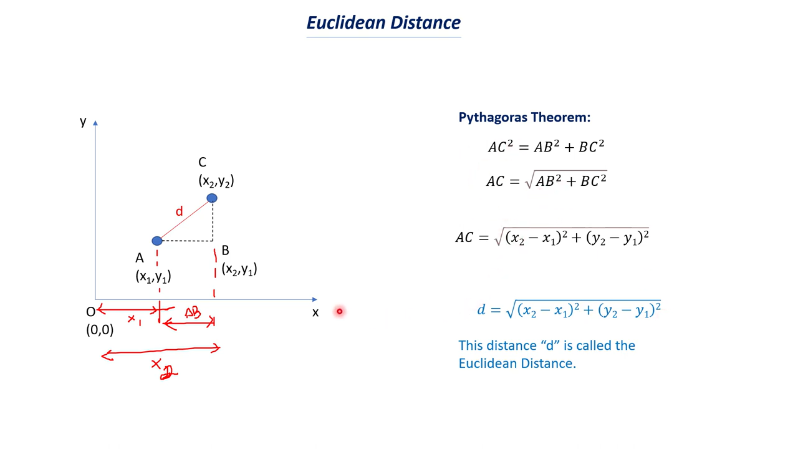)

![Siddhardhan - 7.5.2. Math behind K-Nearest Neighbors (KNN) [bN7Ibb6Mipk - 798x449 - 12m47s].png](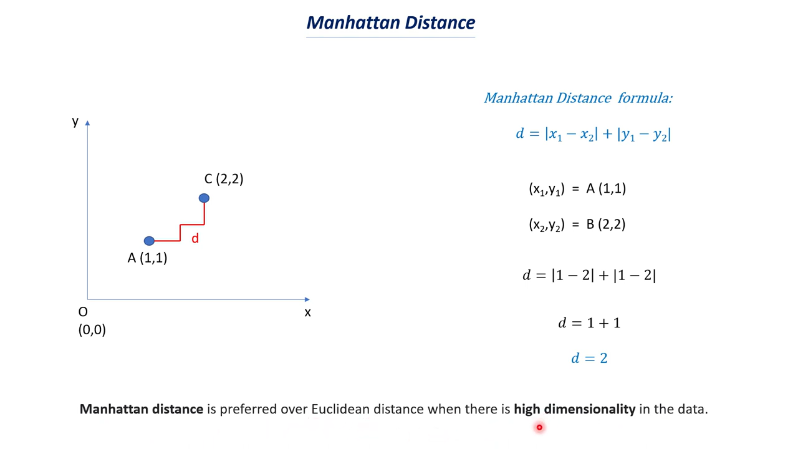)

### Euclidean & Manhattan in Python

In [ ]:
import numpy as np

Euclidean Distance

In [ ]:
# consider two points with 2 dimensions
p1 = (1,1)
p2 = (2,2)

In [ ]:
# calculating Euclidean Distance v

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.4142135623730951


In [ ]:
# consider two points with 3 dimensions
p1 = (1,1,1)
p2 = (2,2,2)

# calculating Euclidean Distance

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.7320508075688772


In [ ]:
# consider two points with 4 dimensions
p1 = (1,1,1,1)
p2 = (2,2,2,2)

dist = 0

for i in range(len(p1)):
  dist = dist + (p1[i] - p2[i])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

2.0



Creating a Function for calculating Euclidean DIstance


In [ ]:
def get_euclidean_distance(p1, p2):

  dist = 0
  for i in range(len(p1)):
    dist = dist + (p1[i] - p2[i])**2

  euclidean_dist = np.sqrt(dist)
  return euclidean_dist

In [ ]:
get_euclidean_distance((1,1,1), (2,2,2))

1.7320508075688772

Manhattan Distance

In [ ]:
def get_manhattan_distance(p1, p2):
  dist = 0
  for i in range(len(p1)):
    dist = dist + abs(p1[i] - p2[i])

  manhattan_dist = dist
  return manhattan_dist

In [ ]:
get_manhattan_distance((1,1,1,1),(2,2,2,2))

4

Calculating distance between two data points

In [ ]:
# distance between two similar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))

50.640300157088326
100.2


In [ ]:
# distance between two dissimilar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))

69.54595602908914
124.8


## KNN classifier from scratch

In [ ]:
import numpy as np
import statistics

In [ ]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):
    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metrics(self, training_data_point, test_data_point):
    if (self.distance_metric == 'euclidean'):
      dist = 0
      if i in range(len(training_data_point)):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)

      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist


  # getting the nearest neighbors
  def nearest_neighbors(self, X_train, test_data, k):

    distance_list = []

    for training_data in X_train:
      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])  # sorting by distance
    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self, X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class